# Lecture 7
1. Variance-Bias Trade-Off
2. Ridge and Lasso Regressions


## 1. Variance-Bias Trade-Off
Let's do some math first.

Using regression, we can buulid a model based on the training data 
$$y=f(x)+\varepsilon,$$
which is an estmate of the underlying true model $\hat{f}(x)$.

The expectation of the squared error is

$$\begin{aligned}
\mathbb{E}\left[\left(y-\hat{f}(x)\right)^2\right]  &= \mathbb{E}\left[y^2-2y\hat{f}(x)+\hat{f}^2(x)\right]\\
&= \mathbb{E}\left[y^2\right]-2\mathbb{E}[y]~\mathbb{E}\left[\hat{f}(x)\right]+\mathbb{E}\left[\hat{f}^2(x)\right]\\
&= \mathbb{E}\left[(y-\mathbb{E}[y])^2\right]+\mathbb{E}^2\left[y\right]-2\mathbb{E}[y]~\mathbb{E}\left[\hat{f}(x)\right]+\mathbb{E}\left[\left(\hat{f}(x)-\mathbb{E}\left[\hat{f}(x)\right]\right)^2\right]+\mathbb{E}^2\left[\hat{f}(x)\right]\\
&=\mathbb{E}\left[\left(\hat{f}(x)-\mathbb{E}\left[\hat{f}(x)\right]\right)^2\right]+   ~~~~~~~~~~~~~~~~~~~~~~~~~~\text{Variance}\\
&~~~~~\left(\mathbb{E}[y]-\mathbb{E}\left[\hat{f}(x)\right]\right)^2+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\text{Bias}\\
&~~~~~\mathbb{E}\left[\left(y-\mathbb{E}(y)\right)^2\right] ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\text{Noise}
\end{aligned}$$
where the third step follows from 
$$\mathbb{E}[Z^2]=\mathbb{E}\left[\left(Z-\mathbb{E}[Z]\right)^2\right] + \mathbb{E}^2[Z].$$

Notice $\mathbb{E}\left[\left(y-\mathbb{E}(y)\right)^2\right]$ is the irreducible error.

This decomposition shows that apart from the noise, there are two sources of error in our model.

* **Variance** tells us how sensitive the model is to small perturbations in the training set.

* **Bias** is related to the difference between the expected value of our estimator and its true value.

* High variance results in *overfitting*.

* High bias results in *under-fitting*.

Finding a good model is therefore a matter of balancing the variance and the bias. 
* This tradeoff applies to algorithms used in supervised learning

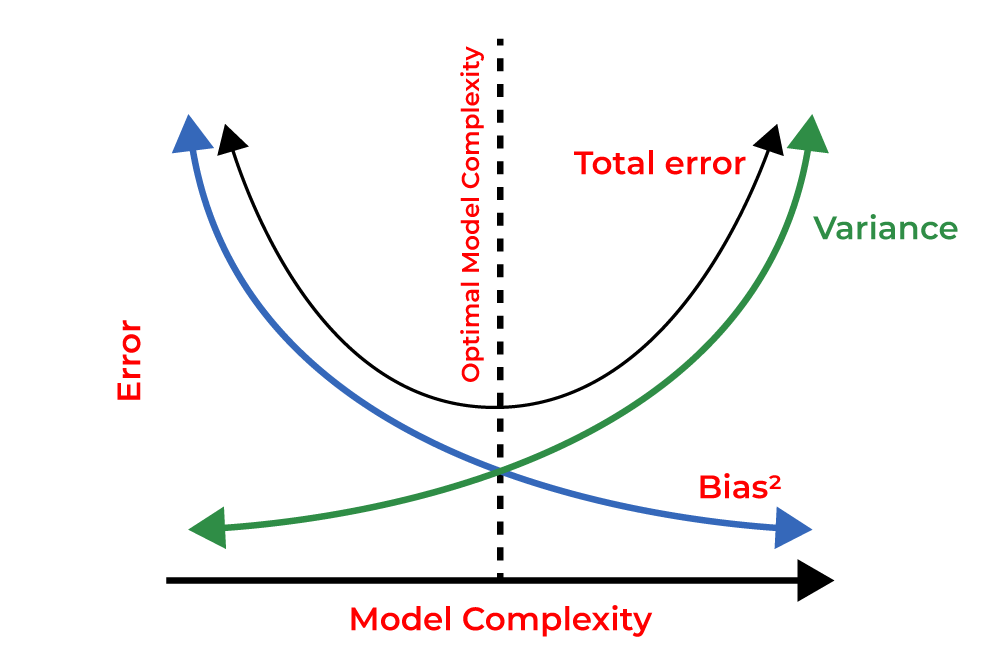

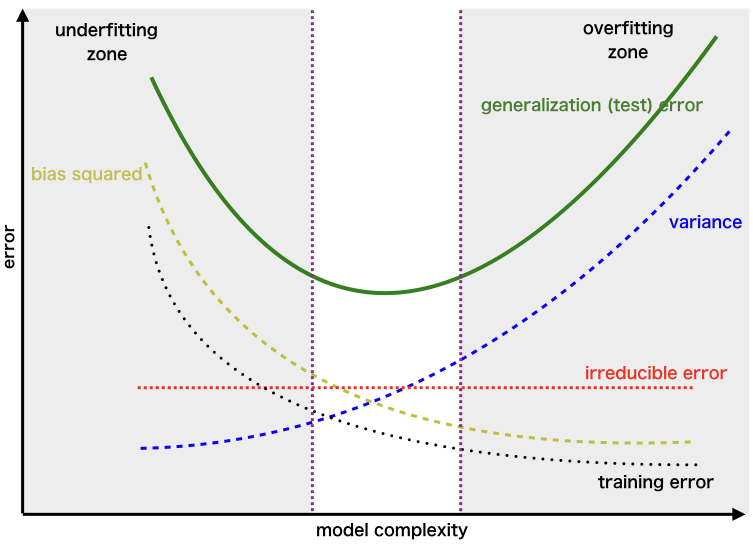

## 2. Ridge and Lasso Regressions
In general, linear regression exhibits high variance and low bias.

It should therefore stand to reason that lowering the variance at the expense of the bias is the way to go.

Smaller coefficients $\beta$ are less sensitive thus leads to smaller variance. Although the estimate will be more biased, but remember that we were happy to sacrifice some of that to make up for the variance.

To keep the coefficients small, we can add regularization terms to the model, which will penalize the model for increased complexity as given by the size of the coefficients. 

### Ridge Regression
Add $\ell_2$-norm as the regularization term.

Recall $$\|\beta\|_2 = \sqrt{\beta_0^2+\beta_1^2+\cdots}$$
is basically Euclidean distance.

The regression model is so-called ridge regression
$$ \beta^{\text{ridge}}=\min_{\beta} \|\mathbf{Y}-\mathbf{X}\beta\|_2^2+\lambda\|\beta\|_2^2$$
where $\lambda$ is the regularization parameter to balance the fit and penalty.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(10)  #Setting seed for reproducability

# Sin function from 60deg to 300deg (converted to radians)
x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
plt.scatter(x,y)
plt.show()

In [ ]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

plt.scatter(x, y)
plt.plot(np.arange(1,5.3,0.1), mymodel(np.arange(1,5.3,0.1)))
plt.show()

In [ ]:
mymodel = np.poly1d(np.polyfit(x, y, 7))

plt.scatter(x, y)
plt.plot(np.arange(1,5.3,0.1), mymodel(np.arange(1,5.3,0.1)))
plt.show()

In [ ]:
mymodel = np.poly1d(np.polyfit(x, y, 11))

plt.scatter(x, y)
plt.plot(np.arange(1,5.3,0.1), mymodel(np.arange(1,5.3,0.1)))
plt.show()

In [ ]:
mymodel = np.poly1d(np.polyfit(x, y, 15))


plt.scatter(x, y)
plt.plot(np.arange(1,5.3,0.1), mymodel(np.arange(1,5.3,0.1)))
plt.show()

Let try ridge regression that fits 15th order polynomial, with different regularization parameters.

In [ ]:
from sklearn.linear_model import Ridge


x_all_power = np.append(np.ones(len(x)),x[:])



for power in range(2,16):
    x_all_power = np.append(x_all_power,x**power)


x_all_power = np.reshape(x_all_power,(16,60)).T
print(x_all_power)

In [ ]:
from sklearn.linear_model import Ridge

x_all_power = np.append(np.ones(len(x)),x[:])

for power in range(2,16):
    x_all_power = np.append(x_all_power,x**power)
    
x_all_power = np.reshape(x_all_power,(16,60)).T

############################################################################

ridge_reg = Ridge(alpha=1e-10)  #python use alpha in place of lambda
ridge_reg.fit(x_all_power,y)
y_pred = ridge_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
ridge_reg = Ridge(alpha=1e-5)  #python use alpha in place of lambda
ridge_reg.fit(x_all_power,y)
y_pred = ridge_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
ridge_reg = Ridge(alpha=0.1)  #python use alpha in place of lambda
ridge_reg.fit(x_all_power,y)
y_pred = ridge_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
ridge_reg = Ridge(alpha=10)  #python use alpha in place of lambda
ridge_reg.fit(x_all_power,y)
y_pred = ridge_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

K-fold cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms

lambda_range = np.linspace(1e-5,1,1000)  # cut to 1000 intervals
lambda_grid = [{'alpha': lambda_range}]

ridge_reg = Ridge()
cv_ridge = GridSearchCV(estimator=ridge_reg, param_grid=lambda_grid, cv=ms.KFold(n_splits=6))

cv_ridge.fit(x_all_power,y)



In [ ]:
print(cv_ridge.best_params_['alpha'])

### Lasso Regression
Add $\ell_1$-norm as the regularization term.

Recall $$\|\beta\|_1 = |\beta_0|+|\beta_1|+\cdots$$
is basically Manhattan distance.

The regression model is so-called Lasso regression
$$ \beta^{\text{lasso}}=\min_{\beta} \|\mathbf{Y}-\mathbf{X}\beta\|_2^2+\lambda\|\beta\|_1$$
where $\lambda$ is the regularization parameter to balance the fit and penalty.

In [ ]:
from sklearn.linear_model import Lasso

x_all_power = np.append(np.ones(len(x)),x[:])

for power in range(2,16):
    x_all_power = np.append(x_all_power,x**power)
    
x_all_power = np.reshape(x_all_power,(16,60)).T

############################################################################

lasso_reg = Lasso(alpha=1e-5)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
y_pred = lasso_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
lasso_reg = Lasso(alpha=1e-3)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
y_pred = lasso_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
lasso_reg = Lasso(alpha=1e-2)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
y_pred = lasso_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
lasso_reg = Lasso(alpha=0.1)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
y_pred = lasso_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
# k-fold
lambda_range = np.linspace(1e-5,1,1000)  # cut to 1000 intervals
lambda_grid = [{'alpha': lambda_range}]

lasso_reg = Lasso()
cv_lasso = GridSearchCV(estimator=lasso_reg, param_grid=lambda_grid, cv=ms.KFold(n_splits=6))

cv_lasso.fit(x_all_power,y)



In [ ]:
print(cv_lasso.best_params_['alpha'])

### Lasso => Sparsity

In [ ]:
lasso_reg = Lasso(alpha=0.0001)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
print(lasso_reg.coef_)

In [ ]:
lasso_reg = Lasso(alpha=0.1)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
print(lasso_reg.coef_)

In [ ]:
lasso_reg = Lasso(alpha=1)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
print(lasso_reg.coef_)

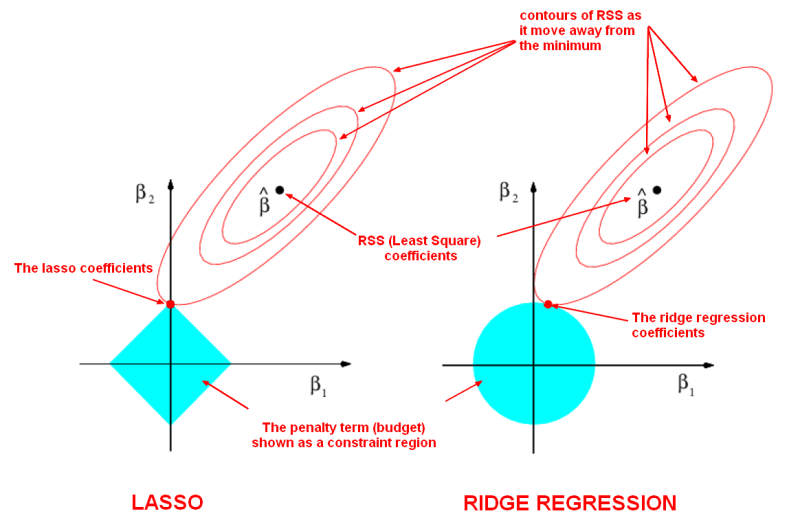

Sparsity is very useful for feature selection!